In [2]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [3]:
csv_files = glob('../lightcurves/xrt/*curve_nosys*')
csv_files

['../lightcurves/xrt/ESO_243-49_HLX-1,curve_nosys_join.csv',
 '../lightcurves/xrt/Holmberg_II_X-1,curve_nosys_join.csv',
 '../lightcurves/xrt/M31_ULX-1,curve_nosys_join.csv',
 '../lightcurves/xrt/M82_X-2,curve_nosys_join.csv',
 '../lightcurves/xrt/NAME_Holmberg_IX_X-1,curve_nosys_join.csv',
 '../lightcurves/xrt/NAME_IC_10_X-1,curve_nosys_join.csv',
 '../lightcurves/xrt/NAME_M83_ULX-1,curve_nosys_join.csv',
 '../lightcurves/xrt/NAME_NGC_1313_X-1,curve_nosys_join.csv',
 '../lightcurves/xrt/NAME_NGC_1313_X-2,curve_nosys_join.csv',
 '../lightcurves/xrt/NAME_NGC_1365-X1,curve_nosys_join.csv',
 '../lightcurves/xrt/NAME_NGC_300_ULX1,curve_nosys_join.csv',
 '../lightcurves/xrt/NAME_NGC_5907_ULX,curve_nosys_join.csv',
 '../lightcurves/xrt/NAME_NGC_7090_ULX3,curve_nosys_join.csv',
 '../lightcurves/xrt/NAME_NGC_7793_P13,curve_nosys_join.csv',
 '../lightcurves/xrt/NAME_NGC_925_ULX-1,curve_nosys_join.csv',
 '../lightcurves/xrt/NAME_NGC_925_ULX-2,curve_nosys_join.csv',
 '../lightcurves/xrt/NAME_UGC_

In [4]:
# Joining Lightcurves Lengthways
df1 = pd.read_csv('../lightcurves/xrt/ESO_243-49_HLX-1,curve_nosys_join.csv', dtype={'obsID':str})
df2 = pd.read_csv('../lightcurves/xrt/ESO_243-49_HLX-1,hardrat_join.csv', dtype={'obsID':str})

df1.set_index('obsID', inplace=True)
df2.set_index('obsID', inplace=True)

df1['Ratepos'] = 2*df1['Ratepos']

df_hard = df2[df2['BAND'] == 'HARD']
df_soft = df2[df2['BAND'] == 'SOFT']
df_hr   = df2[df2['BAND'] == 'HR']

df_1 = df1[['MJD', 'Rate', 'Ratepos']]
df_2 = df_hard[['Rate', 'Error']]
df_3 = df_soft[['Rate', 'Error']]
df_4 = df_hr[['Rate', 'Error']]

df_1.columns = ['MJD', 'rate_full', 'rate_full_err']
df_2.columns = ['rate_hard', 'rate_hard_err']
df_3.columns = ['rate_soft', 'rate_soft_err']
df_4.columns = ['rate_hr', 'rate_hr_err']

df_res = df_1.join(df_2, how='outer').join(df_3, how='outer').join(df_4, how='outer')
df_res = df_res.reset_index()
df_res

,obsID,MJD,rate_full,rate_full_err,rate_hard,rate_hard_err,rate_soft,rate_soft_err,rate_hr,rate_hr_err
0,00031287001,54763.681304,0.012766,0.004685,0.001561,0.000852,0.011203,0.002182,0.139371,0.080773
1,00031287002,54771.204268,0.020196,0.009618,0.003292,0.001950,0.016904,0.004396,0.194743,0.125999
2,00031287003,54777.835972,0.015115,0.005702,0.002040,0.001068,0.013075,0.002643,0.156012,0.087588
3,00031287004,54784.262511,0.025770,0.010407,-0.000117,0.000015,0.025887,0.005204,-0.004526,-0.001087
4,00031287005,55048.554186,0.000996,0.001164,0.000315,0.000285,0.000681,0.000414,0.462153,0.503259
...,...,...,...,...,...,...,...,...,...,...
621,00096887008,59719.326968,0.016444,0.000000,-0.000098,0.000019,-0.000159,0.000024,0.613636,0.150014
622,00096887009,59726.161094,0.025242,0.000000,-0.000142,0.000024,-0.000253,0.000032,0.562500,0.117187
623,00096887010,59733.256976,0.019761,0.000000,-0.000101,0.000022,0.002333,0.002458,-0.043378,-0.046675
624,00096887011,59740.803124,0.015307,0.000000,-0.000073,0.000015,-0.000079,0.000015,0.923077,0.261295


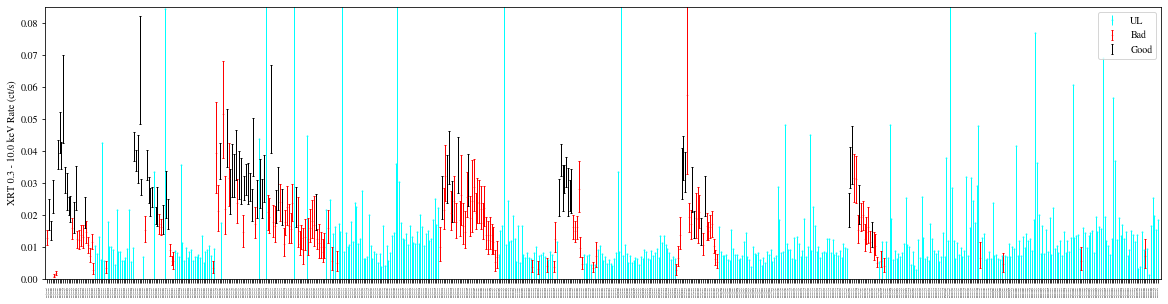

../lightcurves/xrt/ESO_243-49_HLX-1,curve_nosys_join.csv
              MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0    54763.681304  0.569341 -0.569341  0.012766  0.002342  0.002342   
1    54771.204268  0.009576 -0.009576  0.020196  0.004809  0.004809   
2    54777.835972  0.143144 -0.143144  0.015115  0.002851  0.002851   
3    54784.262511  0.009664 -0.009664  0.025770  0.005204  0.005204   
4    55048.554186  0.233226 -0.233226  0.000996  0.000582  0.000442   
..            ...       ...       ...       ...       ...       ...   
621  59719.326968  0.004614 -0.004614  0.016444  0.000000  0.000000   
622  59726.161094  0.006602 -0.006602  0.025242  0.000000  0.000000   
623  59733.256976  0.004455 -0.004455  0.019761  0.000000  0.000000   
624  59740.803124  0.004846 -0.004846  0.015307  0.000000  0.000000   
625  59747.112961  0.004730 -0.004730  0.018398  0.000000  0.000000   

           obsID MODE    BAD     UL  BAND  
0    00031287001   PC   True  False  FULL  
1 

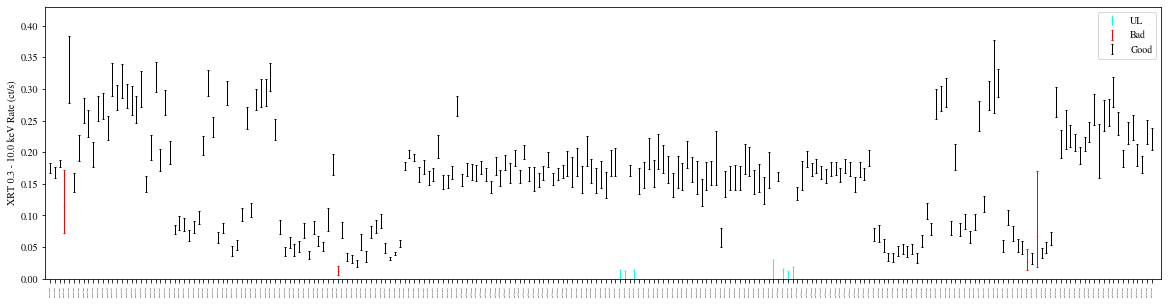

../lightcurves/xrt/Holmberg_II_X-1,curve_nosys_join.csv
              MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0    53756.873039  0.138733 -0.138733  0.175120  0.007395  0.007395   
1    53798.721364  0.136940 -0.136940  0.167664  0.009164  0.009164   
2    53836.495701  0.441781 -0.441781  0.181779  0.005495  0.005495   
3    55166.121484  0.000479 -0.000479  0.115140  0.056938  0.043185   
4    55166.522609  0.000842 -0.000842  0.330245  0.053026  0.053026   
..            ...       ...       ...       ...       ...       ...   
226  59426.585199  0.005427 -0.005427  0.238529  0.019412  0.019412   
227  59430.593075  0.168391 -0.168391  0.195657  0.016744  0.016744   
228  59432.548365  0.470037 -0.470037  0.180676  0.013377  0.013377   
229  59434.800439  0.004774 -0.004774  0.232526  0.018881  0.018881   
230  59436.063897  0.005195 -0.005195  0.220151  0.017277  0.017277   

           obsID MODE    BAD     UL  BAND  
0    00035475001   PC  False  False  FULL  
1  

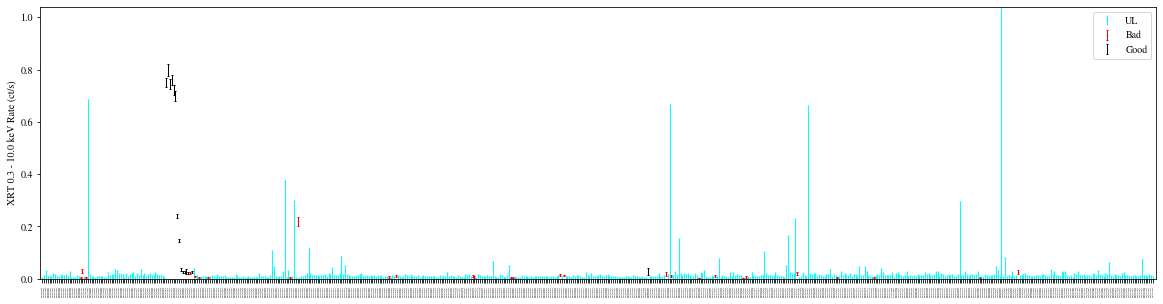

../lightcurves/xrt/M31_ULX-1,curve_nosys_join.csv
              MJD     T_+ve     T_-ve      Rate  Ratepos  Rateneg  \
0    53979.803795  0.073754 -0.073754  0.003559      0.0      0.0   
1    53989.744878  0.041639 -0.041639  0.009974      0.0      0.0   
2    54253.301738  0.004484 -0.004484  0.029114      0.0      0.0   
3    54293.930250  0.069692 -0.069692  0.006177      0.0      0.0   
4    54294.133525  0.076841 -0.076841  0.007828      0.0      0.0   
..            ...       ...       ...       ...      ...      ...   
605  59542.316307  0.008343 -0.008343  0.011922      0.0      0.0   
606  59556.473876  0.171616 -0.171616  0.008257      0.0      0.0   
607  59570.046377  0.004672 -0.004672  0.013493      0.0      0.0   
608  59582.535529  0.006486 -0.006486  0.010659      0.0      0.0   
609  59584.385615  0.337641 -0.337641  0.007207      0.0      0.0   

           obsID MODE    BAD    UL  BAND  
0    00030802001   PC   True  True  FULL  
1    00030804001   PC   True  True 

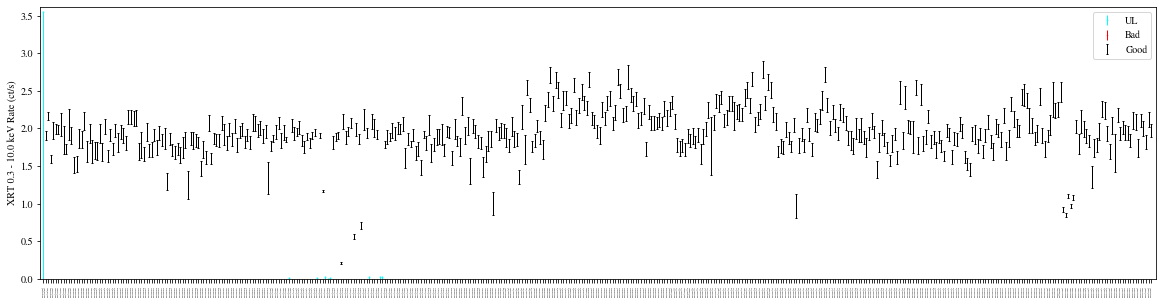

../lightcurves/xrt/M82_X-2,curve_nosys_join.csv
              MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0    54126.121463  0.000024 -0.000024  3.547200  0.000000  0.000000   
1    54587.913165  0.071155 -0.071155  1.908915  0.056250  0.056250   
2    54946.244061  0.107253 -0.107253  2.166025  0.059322  0.059322   
3    55123.327476  0.639791 -0.639791  1.590844  0.050417  0.050417   
4    56022.854307  0.007371 -0.007371  1.971629  0.107915  0.107915   
..            ...       ...       ...       ...       ...       ...   
424  59003.520682  0.401918 -0.401918  2.109735  0.086160  0.086160   
425  59012.754641  0.009620 -0.009620  2.004108  0.099437  0.099437   
426  59215.466606  0.037239 -0.037239  1.819970  0.088108  0.088108   
427  59326.228802  0.009751 -0.009751  2.121936  0.100854  0.100854   
428  59674.549605  0.441696 -0.441696  1.975592  0.085362  0.085362   

           obsID MODE    BAD     UL  BAND  
0    00035482001   WT  False   True  FULL  
1    000312

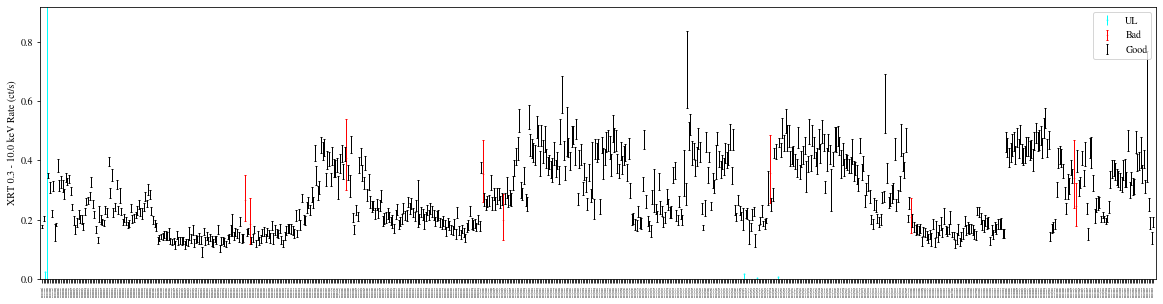

../lightcurves/xrt/NAME_Holmberg_IX_X-1,curve_nosys_join.csv
              MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0    53923.419817  0.375981 -0.375981  0.177696  0.004402  0.004402   
1    53924.554355  0.172681 -0.172681  0.203228  0.008992  0.008992   
2    53924.659843  0.001915 -0.001915  0.021992  0.000000  0.000000   
3    54022.778491  0.301056 -0.301056  1.676800  0.000000  0.000000   
4    54026.504954  0.475559 -0.475559  0.348799  0.007783  0.007783   
..            ...       ...       ...       ...       ...       ...   
697  59366.801270  0.000450 -0.000450  0.548157  0.222709  0.222709   
698  59369.572240  0.003816 -0.003816  0.251993  0.021888  0.021888   
699  59373.026283  0.003932 -0.003932  0.188415  0.020464  0.020464   
700  59380.185592  0.005049 -0.005049  0.138275  0.021520  0.021520   
701  59387.018064  0.005224 -0.005224  0.191977  0.017150  0.017150   

           obsID MODE    BAD     UL  BAND  
0    00035335001   PC  False  False  FULL 

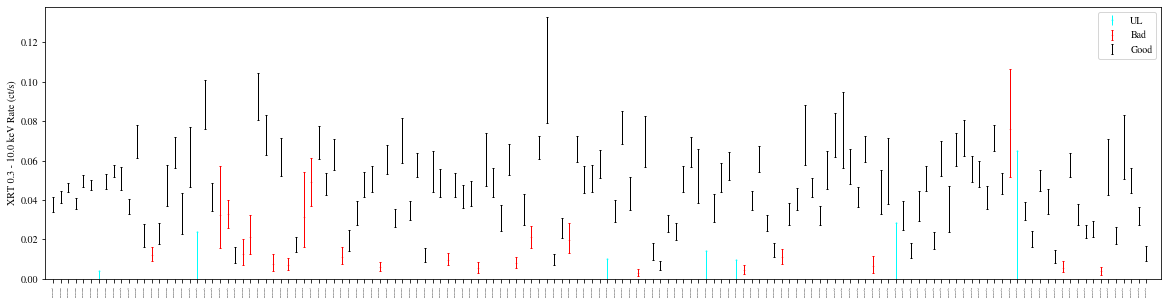

../lightcurves/xrt/NAME_IC_10_X-1,curve_nosys_join.csv
              MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0    54060.841994  0.107278 -0.107278  0.037590  0.003708  0.003708   
1    54061.311039  0.301977 -0.301977  0.041626  0.003136  0.003136   
2    54062.549593  0.407305 -0.407305  0.046451  0.002390  0.002390   
3    54063.485360  0.474338 -0.474338  0.038372  0.002826  0.002826   
4    54064.362088  0.340649 -0.340649  0.049475  0.003132  0.003132   
..            ...       ...       ...       ...       ...       ...   
140  59742.469955  0.009533 -0.009533  0.022050  0.004239  0.004239   
141  59750.824996  0.002423 -0.002423  0.066774  0.016353  0.016353   
142  59752.218065  0.009344 -0.009344  0.049759  0.006345  0.006345   
143  59756.326881  0.272771 -0.272771  0.031857  0.004418  0.004418   
144  59763.089600  0.007966 -0.007966  0.012618  0.004042  0.003357   

           obsID MODE    BAD     UL  BAND  
0    00030835001   PC  False  False  FULL  
1   

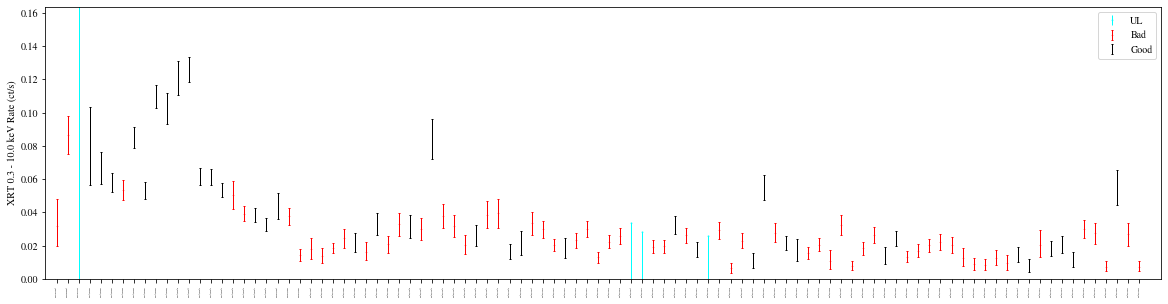

../lightcurves/xrt/NAME_M83_ULX-1,curve_nosys_join.csv
             MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0   53379.954651  0.001262 -0.001262  0.031849  0.015891  0.012052   
1   53394.158409  0.147139 -0.147139  0.086587  0.011477  0.011477   
2   53394.975559  0.000122 -0.000122  0.810560  0.000000  0.000000   
3   55564.707159  0.001103 -0.001103  0.077575  0.025535  0.021036   
4   55565.582985  0.005804 -0.005804  0.066685  0.009616  0.009616   
..           ...       ...       ...       ...       ...       ...   
94  59716.177811  0.007951 -0.007951  0.027355  0.006298  0.006298   
95  59733.947439  0.007763 -0.007763  0.007143  0.003305  0.002605   
96  59737.658809  0.004681 -0.004681  0.054979  0.010780  0.010780   
97  59744.688174  0.007915 -0.007915  0.026912  0.006923  0.006923   
98  59751.386684  0.007908 -0.007908  0.007195  0.003474  0.002738   

          obsID MODE    BAD     UL  BAND  
0   00067042001   PC   True  False  FULL  
1   00056050001   

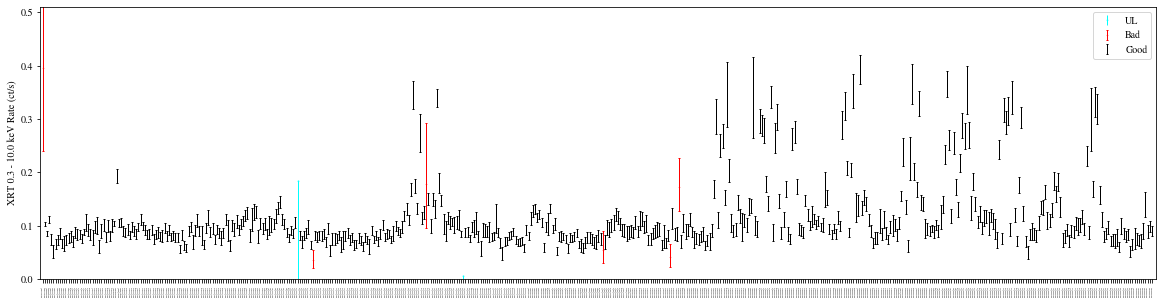

../lightcurves/xrt/NAME_NGC_1313_X-1,curve_nosys_join.csv
              MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0    53769.955864  0.000087 -0.000087  0.396504  0.211426  0.156160   
1    53907.542494  0.442892 -0.442892  0.103128  0.004291  0.004291   
2    54427.799480  0.174789 -0.174789  0.084655  0.005089  0.005089   
3    54439.528099  0.138517 -0.138517  0.111142  0.006437  0.006437   
4    55064.115615  0.005833 -0.005833  0.073337  0.009897  0.009897   
..            ...       ...       ...       ...       ...       ...   
505  59648.232686  0.005151 -0.005151  0.089818  0.015296  0.015296   
506  59655.596877  0.004861 -0.004861  0.138869  0.023389  0.023389   
507  59662.319302  0.037295 -0.037295  0.088497  0.011923  0.011923   
508  59669.389357  0.006109 -0.006109  0.098103  0.010808  0.010808   
509  59676.377734  0.362877 -0.362877  0.089463  0.008851  0.008851   

           obsID MODE    BAD     UL  BAND  
0    00035473001   PC   True  False  FULL  
1

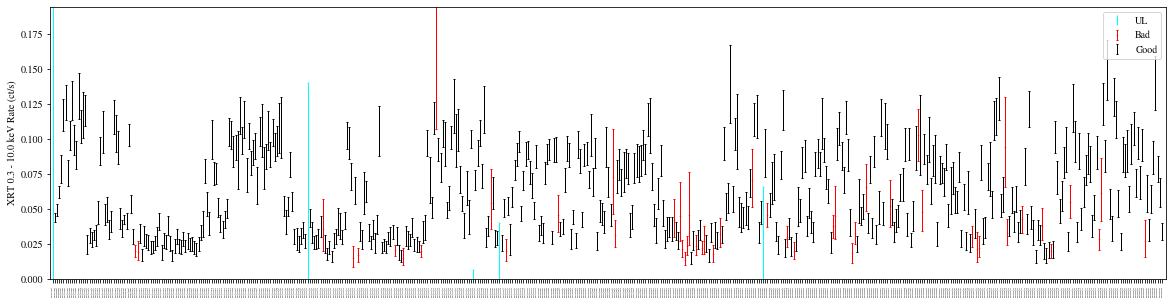

../lightcurves/xrt/NAME_NGC_1313_X-2,curve_nosys_join.csv
              MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0    53769.955864  0.000087 -0.000087  0.619780  0.000000  0.000000   
1    53907.542494  0.442892 -0.442892  0.043785  0.003143  0.003143   
2    54427.799480  0.174789 -0.174789  0.049547  0.004303  0.004303   
3    54439.496154  0.106572 -0.106572  0.062177  0.004523  0.004523   
4    55064.115615  0.005833 -0.005833  0.078728  0.009972  0.009972   
..            ...       ...       ...       ...       ...       ...   
505  59648.232686  0.005151 -0.005151  0.087044  0.011696  0.011696   
506  59655.596877  0.004861 -0.004861  0.139982  0.019387  0.019387   
507  59662.319302  0.037295 -0.037295  0.078810  0.009489  0.009489   
508  59669.389357  0.006109 -0.006109  0.061793  0.010331  0.010331   
509  59676.377734  0.362877 -0.362877  0.033945  0.005986  0.005986   

           obsID MODE    BAD     UL  BAND  
0    00035473001   PC   True   True  FULL  
1

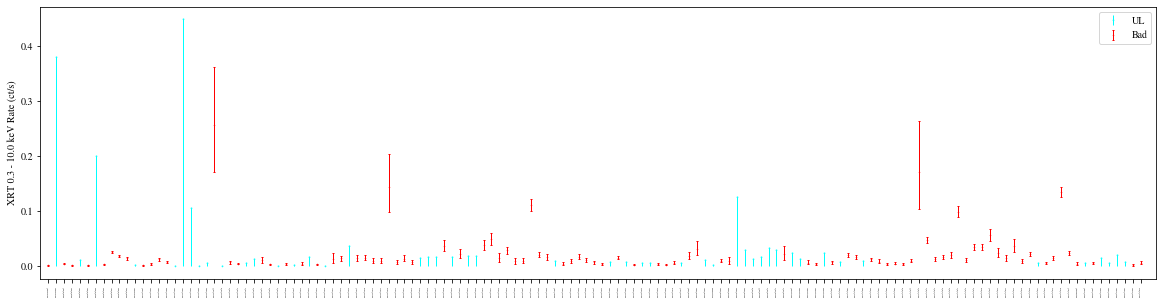

../lightcurves/xrt/NAME_NGC_1365-X1,curve_nosys_join.csv
              MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0    53937.506456  0.474055 -0.474055  0.002095  0.000713  0.000592   
1    53940.286572  0.570537 -0.570537  0.380090  0.000000  0.000000   
2    54964.343096  0.298508 -0.298508  0.004983  0.001082  0.001082   
3    54995.109738  0.074226 -0.074226  0.001946  0.001003  0.000777   
4    54998.124374  0.069292 -0.069292  0.010842  0.000000  0.000000   
..            ...       ...       ...       ...       ...       ...   
134  59324.706434  0.037681 -0.037681  0.005949  0.000000  0.000000   
135  59326.278250  0.004048 -0.004048  0.021060  0.000000  0.000000   
136  59326.741285  0.135558 -0.135558  0.008496  0.000000  0.000000   
137  59327.935227  0.867220 -0.867220  0.002573  0.001513  0.001118   
138  59573.369846  0.007574 -0.007574  0.006086  0.003051  0.002363   

           obsID MODE   BAD     UL  BAND  
0    00035458001   PC  True  False  FULL  
1   

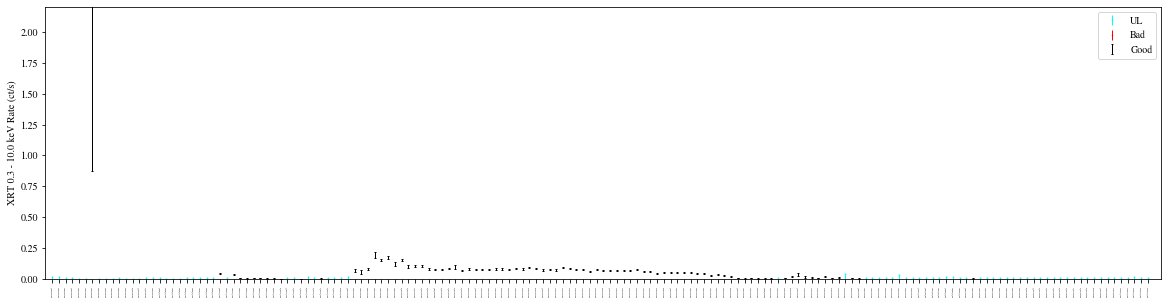

../lightcurves/xrt/NAME_NGC_300_ULX1,curve_nosys_join.csv
              MJD     T_+ve     T_-ve      Rate  Ratepos  Rateneg  \
0    53983.345698  0.070516 -0.070516  0.017129      0.0      0.0   
1    54040.006270  0.004103 -0.004103  0.018291      0.0      0.0   
2    54046.061218  0.038060 -0.038060  0.004799      0.0      0.0   
3    54096.515774  0.070994 -0.070994  0.005631      0.0      0.0   
4    54098.354980  0.307484 -0.307484  0.001558      0.0      0.0   
..            ...       ...       ...       ...      ...      ...   
159  59510.483244  0.367116 -0.367116  0.006454      0.0      0.0   
160  59541.349178  0.304644 -0.304644  0.005854      0.0      0.0   
161  59571.008974  0.367637 -0.367637  0.011666      0.0      0.0   
162  59576.482723  0.464137 -0.464137  0.008088      0.0      0.0   
163  59682.418457  0.366607 -0.366607  0.003621      0.0      0.0   

           obsID MODE    BAD    UL  BAND  
0    00035866001   PC  False  True  FULL  
1    00035866002   PC  Fals

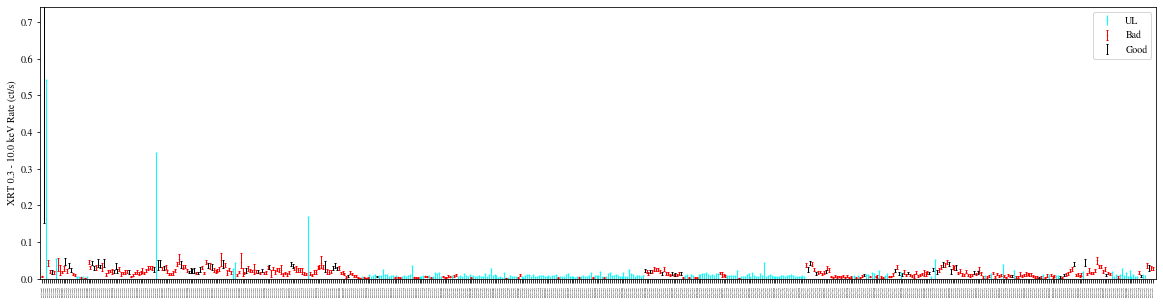

../lightcurves/xrt/NAME_NGC_5907_ULX,curve_nosys_join.csv
              MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0    55420.683361  0.308907 -0.308907  0.006598  0.001343  0.001343   
1    55421.912731  0.000011 -0.000011  0.569603  0.855544  0.416950   
2    55423.393752  0.124699 -0.124699  0.541870  0.000000  0.000000   
3    55685.262371  0.037537 -0.037537  0.043899  0.008116  0.008116   
4    55696.129386  0.068427 -0.068427  0.019846  0.003773  0.003773   
..            ...       ...       ...       ...       ...       ...   
573  59740.381739  0.071380 -0.071380  0.008574  0.000000  0.000000   
574  59744.327926  0.106446 -0.106446  0.036751  0.006074  0.006074   
575  59747.817423  0.003744 -0.003744  0.029574  0.007819  0.007819   
576  59751.896688  0.037668 -0.037668  0.030169  0.004866  0.004866   
577  59754.782366  0.009620 -0.009620  0.028313  0.004743  0.004743   

           obsID MODE    BAD     UL  BAND  
0    00031785001   PC   True  False  FULL  
1

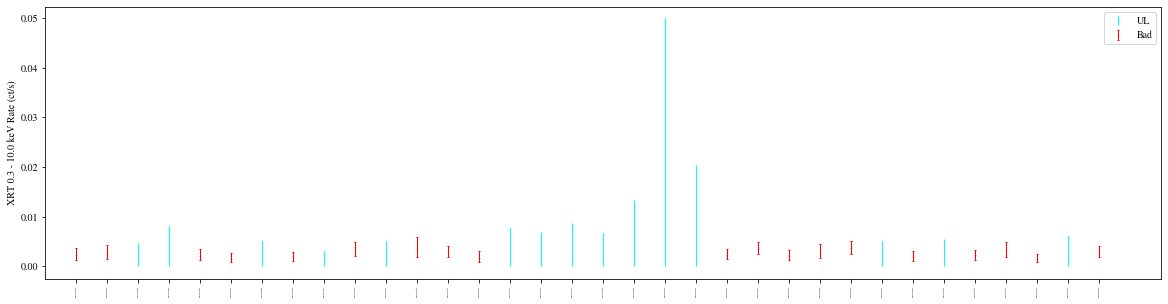

../lightcurves/xrt/NAME_NGC_7090_ULX3,curve_nosys_join.csv
             MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0   54002.272374  0.167877 -0.167877  0.002247  0.001467  0.001044   
1   54039.108585  0.071232 -0.071232  0.002588  0.001659  0.001180   
2   55984.250830  0.209159 -0.209159  0.004432  0.000000  0.000000   
3   55998.505877  0.471102 -0.471102  0.007879  0.000000  0.000000   
4   56012.168799  0.106795 -0.106795  0.002175  0.001307  0.000966   
5   56026.404880  0.374178 -0.374178  0.001570  0.001038  0.000739   
6   56040.506315  0.441486 -0.441486  0.004902  0.000000  0.000000   
7   56054.421061  0.369799 -0.369799  0.001897  0.001021  0.000774   
8   56068.584869  0.303892 -0.303892  0.002915  0.000000  0.000000   
9   56082.547330  0.370602 -0.370602  0.003335  0.001512  0.001191   
10  56096.488757  0.402795 -0.402795  0.005005  0.000000  0.000000   
11  56099.460382  0.441585 -0.441585  0.003598  0.002365  0.001682   
12  56110.573636  0.074162 -0.0

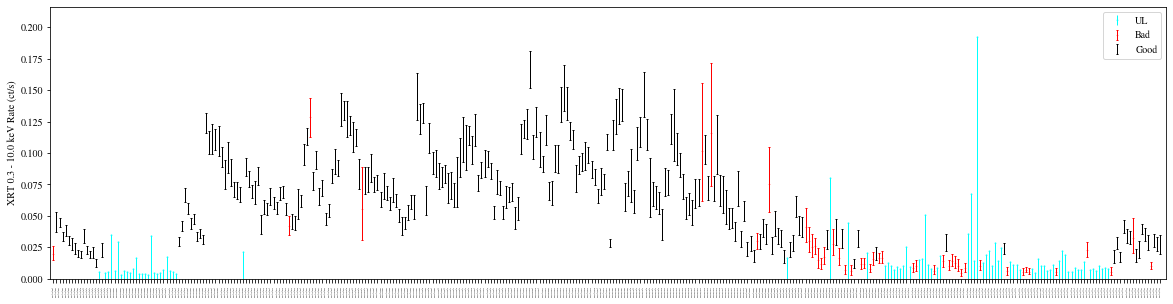

../lightcurves/xrt/NAME_NGC_7793_P13,curve_nosys_join.csv
              MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0    55424.103416  0.068726 -0.068726  0.019844  0.006221  0.005164   
1    55432.311882  0.005398 -0.005398  0.045036  0.008054  0.008054   
2    55436.731035  0.143181 -0.143181  0.044572  0.003750  0.003750   
3    55440.307721  0.106760 -0.106760  0.033784  0.003418  0.003418   
4    55444.258531  0.298326 -0.298326  0.038386  0.004323  0.004323   
..            ...       ...       ...       ...       ...       ...   
358  59725.921507  0.036478 -0.036478  0.029251  0.005965  0.005965   
359  59732.660562  0.268243 -0.268243  0.010308  0.003194  0.002669   
360  59741.111856  0.303068 -0.303068  0.030360  0.004905  0.004905   
361  59746.312018  0.006921 -0.006921  0.027850  0.005561  0.005561   
362  59753.205503  0.003860 -0.003860  0.026643  0.007948  0.006642   

           obsID MODE    BAD     UL  BAND  
0    00031791001   PC   True  False  FULL  
1

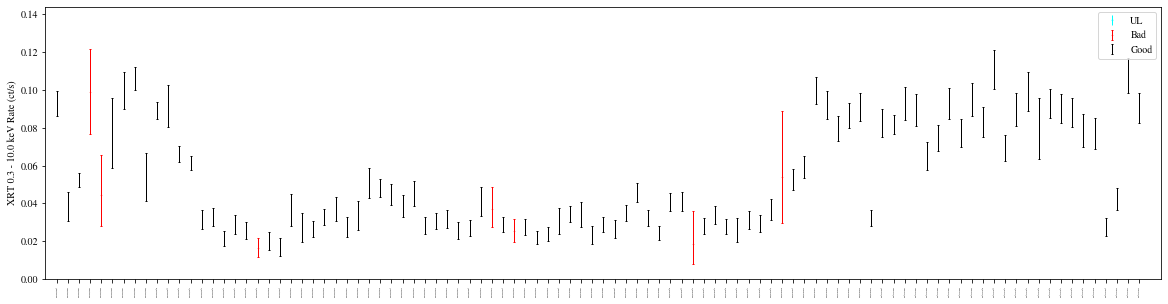

../lightcurves/xrt/NAME_NGC_925_ULX-1,curve_nosys_join.csv
             MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0   55763.529940  0.136618 -0.136618  0.092861  0.006694  0.006694   
1   55768.616477  0.004933 -0.004933  0.038323  0.007899  0.007899   
2   55769.313197  0.310957 -0.310957  0.052336  0.003528  0.003528   
3   55773.536703  0.435412 -0.435412  0.099190  0.022401  0.022401   
4   55775.074878  0.034051 -0.034051  0.044232  0.021112  0.016025   
..           ...       ...       ...       ...       ...       ...   
93  59515.434145  0.008575 -0.008575  0.077064  0.008255  0.008255   
94  59522.339228  0.009722 -0.009722  0.027632  0.004771  0.004771   
95  59529.248014  0.009983 -0.009983  0.042432  0.005760  0.005760   
96  59537.836777  0.171201 -0.171201  0.107445  0.009259  0.009259   
97  59543.145915  0.176657 -0.176657  0.090628  0.007920  0.007920   

          obsID MODE    BAD     UL  BAND  
0   00045596001   PC  False  False  FULL  
1   0004559600

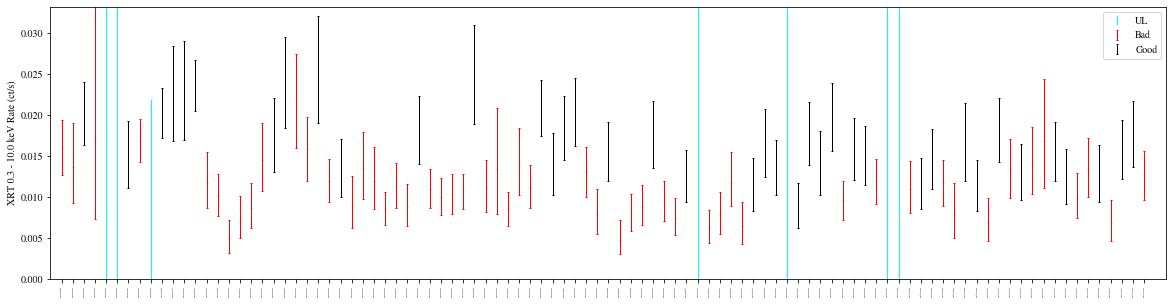

../lightcurves/xrt/NAME_NGC_925_ULX-2,curve_nosys_join.csv
             MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0   55763.529940  0.136618 -0.136618  0.016013  0.003370  0.003370   
1   55768.616477  0.004933 -0.004933  0.013602  0.005414  0.004377   
2   55769.313197  0.310957 -0.310957  0.020128  0.003848  0.003848   
3   55773.536703  0.435412 -0.435412  0.017127  0.016136  0.009871   
4   55775.074878  0.034051 -0.034051  0.059928  0.000000  0.000000   
..           ...       ...       ...       ...       ...       ...   
93  59515.434145  0.008575 -0.008575  0.012854  0.003501  0.003501   
94  59522.339228  0.009722 -0.009722  0.006833  0.002809  0.002245   
95  59529.248014  0.009983 -0.009983  0.015738  0.003558  0.003558   
96  59537.674296  0.008720 -0.008720  0.017660  0.004059  0.004059   
97  59543.145915  0.176657 -0.176657  0.012592  0.003025  0.003025   

          obsID MODE    BAD     UL  BAND  
0   00045596001   PC   True  False  FULL  
1   0004559600

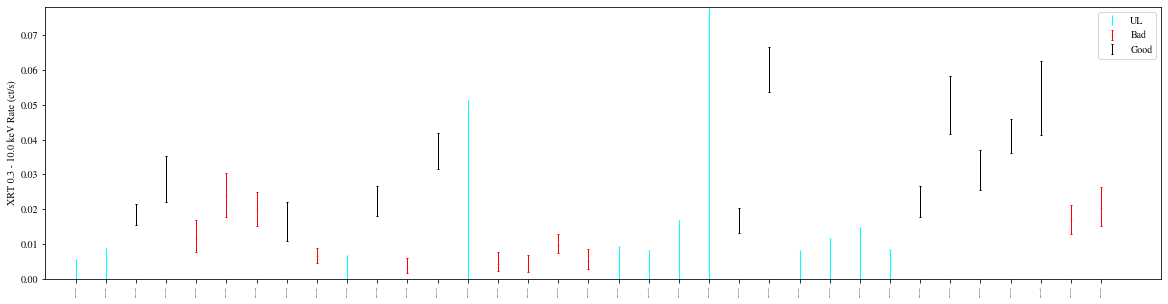

../lightcurves/xrt/NAME_UGC_6456_ULX,curve_nosys_join.csv
             MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0   55588.503469  0.110330 -0.110330  0.005362  0.000000  0.000000   
1   55593.016665  0.009620 -0.009620  0.008490  0.000000  0.000000   
2   56733.493686  0.506159 -0.506159  0.018563  0.002970  0.002970   
3   56738.734508  0.004919 -0.004919  0.028683  0.006688  0.006688   
4   56739.457284  0.004367 -0.004367  0.011752  0.005243  0.004063   
5   56745.454311  0.469845 -0.469845  0.024127  0.006362  0.006362   
6   56748.511862  0.401868 -0.401868  0.020148  0.004899  0.004899   
7   56753.914966  0.004324 -0.004324  0.015928  0.006234  0.004982   
8   57875.507473  0.037426 -0.037426  0.006457  0.002378  0.001922   
9   57958.468993  0.069648 -0.069648  0.006480  0.000000  0.000000   
10  57981.724735  0.036836 -0.036836  0.022380  0.004270  0.004270   
11  57988.033559  0.031461 -0.031461  0.003380  0.002587  0.001740   
12  58219.142596  0.036311 -0.03

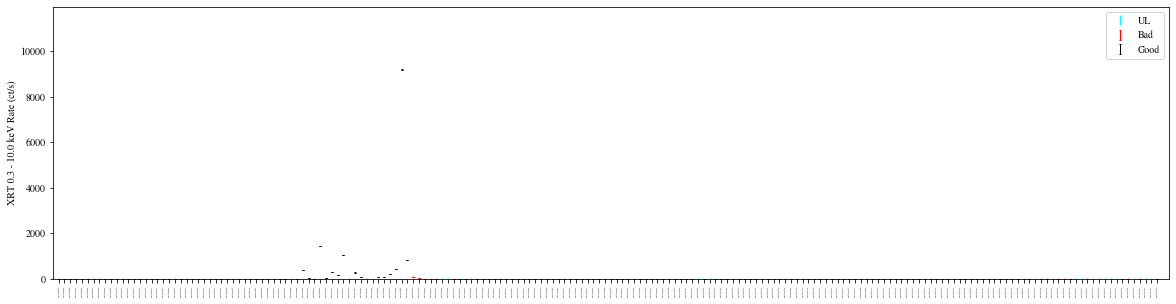

../lightcurves/xrt/NOVA_Cyg_1989,curve_nosys_join.csv
              MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0    54947.636853  0.074869 -0.074869  0.029834  0.004370  0.004370   
1    56111.877118  0.043584 -0.043584  0.027866  0.003705  0.003705   
2    56113.949102  0.042435 -0.042435  0.016238  0.002685  0.002685   
3    56117.820425  0.110002 -0.110002  0.015943  0.002851  0.002851   
4    56121.836448  0.109254 -0.109254  0.019628  0.002400  0.002400   
..            ...       ...       ...       ...       ...       ...   
185  59257.495029  0.004614 -0.004614  0.014531  0.000000  0.000000   
186  59262.921188  0.004861 -0.004861  0.007338  0.004112  0.003037   
187  59265.783476  0.144659 -0.144659  0.011273  0.000000  0.000000   
188  59268.843735  0.003149 -0.003149  0.023517  0.000000  0.000000   
189  59685.818351  0.009765 -0.009765  0.012303  0.003256  0.003256   

           obsID MODE    BAD     UL  BAND  
0    00031403001   PC  False  False  FULL  
1    

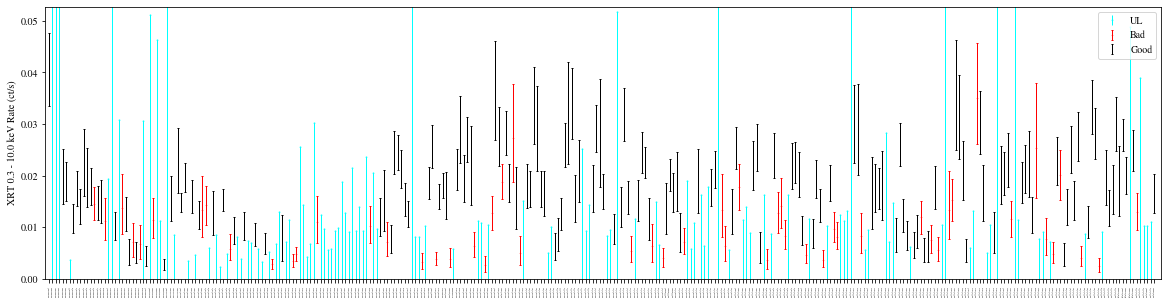

../lightcurves/xrt/RX_J133001+47137,curve_nosys_join.csv
              MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0    53551.883005  0.011537 -0.011537  0.040536  0.007049  0.007049   
1    53554.553158  0.001344 -0.001344  0.212950  0.000000  0.000000   
2    53554.621412  0.001040 -0.001040  0.534880  0.000000  0.000000   
3    53554.621412  0.001040 -0.001040  0.174150  0.000000  0.000000   
4    53554.699783  0.012014 -0.012014  0.019858  0.005332  0.005332   
..            ...       ...       ...       ...       ...       ...   
313  59690.632668  0.004469 -0.004469  0.038953  0.000000  0.000000   
314  59693.917860  0.763729 -0.763729  0.010309  0.000000  0.000000   
315  59699.527158  0.009983 -0.009983  0.010332  0.000000  0.000000   
316  59702.821431  0.167087 -0.167087  0.011061  0.000000  0.000000   
317  59727.246617  0.009968 -0.009968  0.016494  0.003798  0.003798   

           obsID MODE    BAD     UL  BAND  
0    00030083001   PC  False  False  FULL  
1 

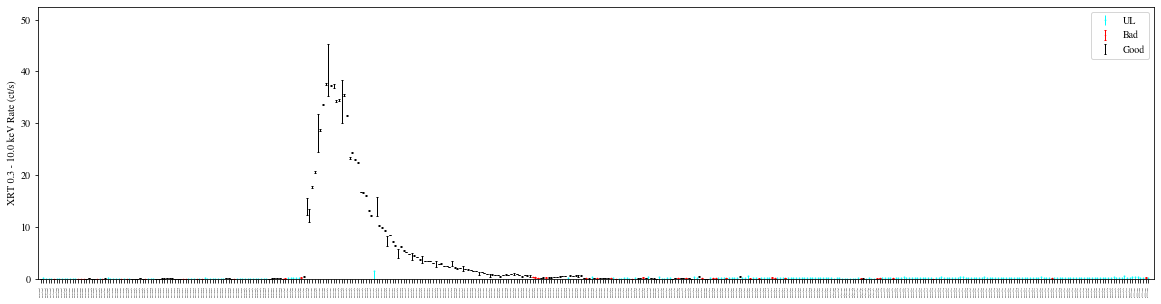

../lightcurves/xrt/SMC_X-3,curve_nosys_join.csv
              MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0    53683.866068  0.133923 -0.133923  0.050794  0.005311  0.005311   
1    53875.787602  0.228461 -0.228461  0.205780  0.000000  0.000000   
2    54061.422381  0.134525 -0.134525  0.009430  0.000000  0.000000   
3    54646.213929  0.039488 -0.039488  0.005540  0.000000  0.000000   
4    54662.169310  0.002147 -0.002147  0.050619  0.000000  0.000000   
..            ...       ...       ...       ...       ...       ...   
408  59709.054729  0.000247 -0.000247  0.326170  0.000000  0.000000   
409  59716.010009  0.000218 -0.000218  0.204800  0.000000  0.000000   
410  59723.044109  0.000247 -0.000247  0.179010  0.000000  0.000000   
411  59730.069856  0.000247 -0.000247  0.162674  0.120520  0.081169   
412  59737.479490  0.000290 -0.000290  0.153090  0.000000  0.000000   

           obsID MODE    BAD     UL  BAND  
0    00030340001   PC  False  False  FULL  
1    000354

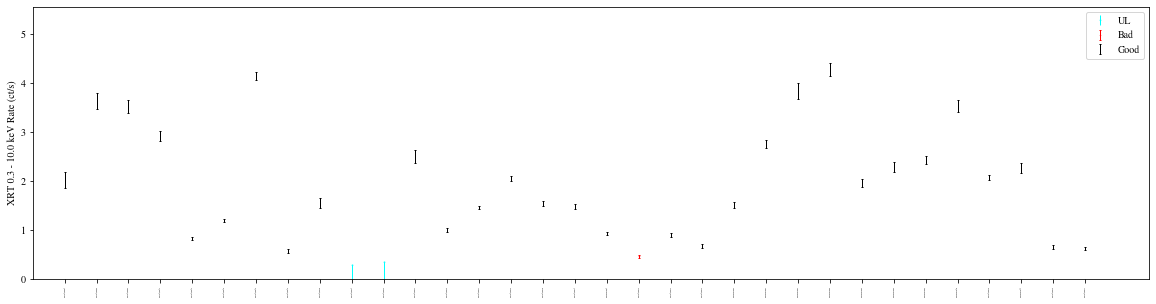

../lightcurves/xrt/SS433,curve_nosys_join.csv
             MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0   53581.561224  0.001829 -0.001829  2.017043  0.165408  0.165408   
1   53583.574825  0.006413 -0.006413  3.622651  0.166368  0.166368   
2   53583.789984  0.007211 -0.007211  3.511266  0.135013  0.135013   
3   53600.080764  0.038674 -0.038674  2.902686  0.103106  0.103106   
4   53916.776009  0.201031 -0.201031  0.828199  0.027528  0.027528   
5   53917.781497  0.672641 -0.672641  1.188327  0.022532  0.022532   
6   54042.864155  0.066473 -0.066473  4.135860  0.084533  0.084533   
7   54350.684014  0.071479 -0.071479  0.569738  0.040696  0.040696   
8   54355.570809  0.002757 -0.002757  1.544899  0.096796  0.096796   
9   54356.568954  0.000174 -0.000174  0.287270  0.000000  0.000000   
10  54357.568805  0.000160 -0.000160  0.334950  0.000000  0.000000   
11  54359.720759  0.004193 -0.004193  2.491520  0.132378  0.132378   
12  56215.995363  0.004707 -0.004707  0.9993

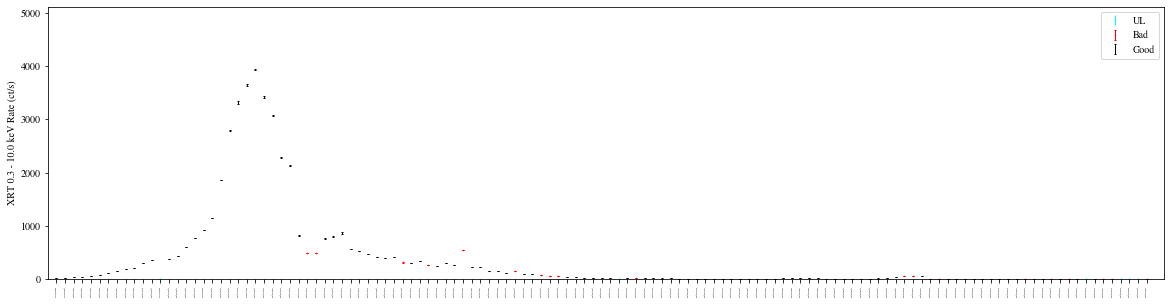

../lightcurves/xrt/SWIFT_J0243.6+6124,curve_nosys_join.csv
              MJD     T_+ve     T_-ve       Rate   Ratepos   Rateneg  \
0    58029.350435  0.037692 -0.037692  15.463040  0.286156  0.286156   
1    58029.480138  0.040984 -0.040984  15.136310  0.258419  0.258419   
2    58031.834272  0.004395 -0.004395  34.952820  0.240109  0.240118   
3    58032.069817  0.038248 -0.038248  39.448910  0.142774  0.142774   
4    58033.359155  0.010039 -0.010039  45.888090  0.218567  0.218447   
..            ...       ...       ...        ...       ...       ...   
122  58748.414538  0.337952 -0.337952   0.004913  0.001513  0.001265   
123  59060.375203  0.373104 -0.373104   0.012207  0.000000  0.000000   
124  59108.674284  0.201342 -0.201342   0.007209  0.000000  0.000000   
125  59108.747236  0.005049 -0.005049   0.010278  0.000000  0.000000   
126  59331.880914  0.039629 -0.039629   0.005162  0.002032  0.001624   

           obsID MODE    BAD     UL  BAND  
0    00775946000   PC  False  Fa

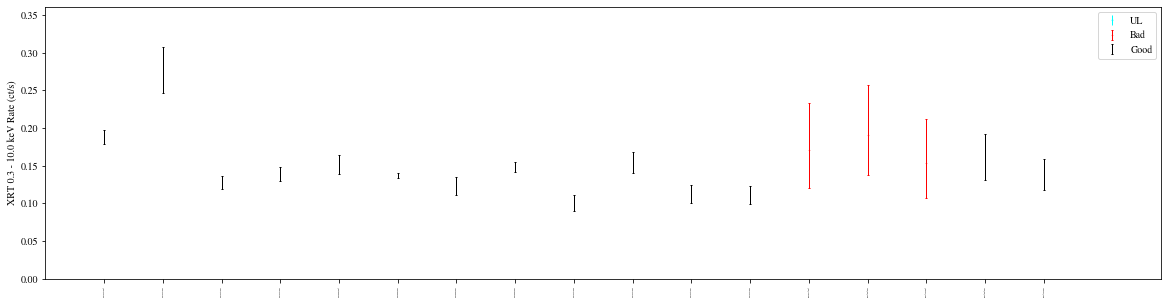

../lightcurves/xrt/[LB2005]_NGC_253_X2,curve_nosys_join.csv
             MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0   54002.608510  0.167151 -0.167151  0.187678  0.009291  0.009291   
1   54128.978048  0.003845 -0.003845  0.277402  0.030686  0.030686   
2   54489.432547  0.039621 -0.039621  0.127954  0.009045  0.009045   
3   56174.757796  0.039248 -0.039248  0.139440  0.009434  0.009434   
4   56187.758395  0.006762 -0.006762  0.152129  0.012767  0.012767   
5   56248.588249  0.374822 -0.374822  0.137015  0.003877  0.003877   
6   56249.766144  0.006646 -0.006646  0.123392  0.012237  0.012237   
7   56251.286865  0.138691 -0.138691  0.147953  0.006422  0.006422   
8   58039.927510  0.006268 -0.006268  0.100324  0.010930  0.010930   
9   58040.514853  0.005731 -0.005731  0.154139  0.013899  0.013899   
10  58041.850281  0.005717 -0.005717  0.112641  0.012389  0.012389   
11  58046.569694  0.005746 -0.005746  0.111718  0.011976  0.011976   
12  58710.431473  0.000464 -0.

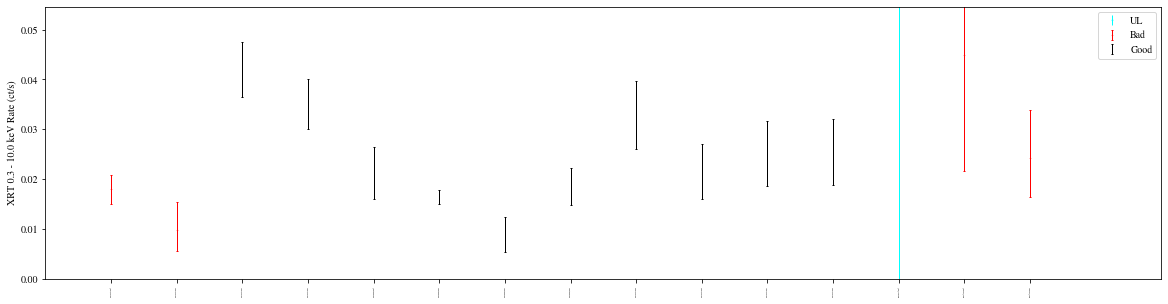

../lightcurves/xrt/[LB2005]_NGC_253_X9,curve_nosys_join.csv
             MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0   54002.608510  0.167151 -0.167151  0.017932  0.002868  0.002868   
1   54128.978048  0.003845 -0.003845  0.009819  0.005553  0.004215   
2   54489.432547  0.039621 -0.039621  0.041961  0.005554  0.005554   
3   56174.757796  0.039248 -0.039248  0.035088  0.005032  0.005032   
4   56187.758395  0.006762 -0.006762  0.021249  0.005155  0.005155   
5   56248.753409  0.209662 -0.209662  0.016411  0.001472  0.001472   
6   56249.766144  0.006646 -0.006646  0.008477  0.003922  0.003134   
7   56251.287575  0.072706 -0.072706  0.018454  0.003731  0.003731   
8   58039.927510  0.006268 -0.006268  0.032926  0.006819  0.006819   
9   58040.514853  0.005731 -0.005731  0.021534  0.005514  0.005514   
10  58041.850281  0.005717 -0.005717  0.025169  0.006480  0.006480   
11  58046.569694  0.005746 -0.005746  0.025488  0.006655  0.006655   
12  58710.431473  0.000464 -0.

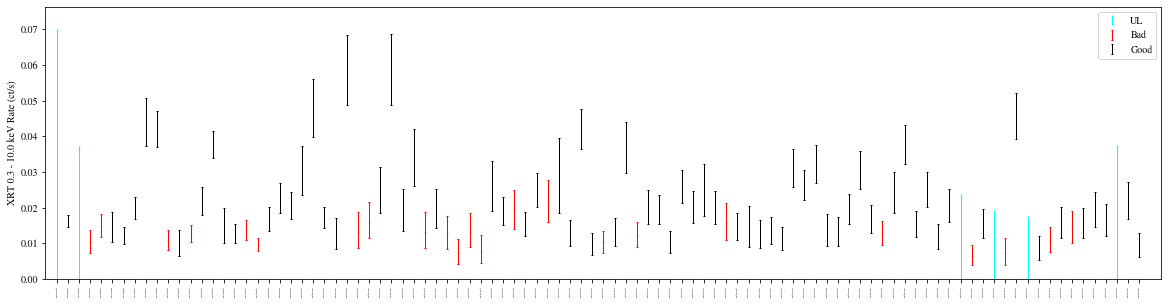

../lightcurves/xrt/[LB2005]_NGC_5236_X11,curve_nosys_join.csv
             MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0   53379.954651  0.001262 -0.001262  0.069921  0.000000  0.000000   
1   53394.154044  0.142699 -0.142699  0.016298  0.001664  0.001664   
2   55564.740622  0.034566 -0.034566  0.037024  0.000000  0.000000   
3   55565.616671  0.039491 -0.039491  0.010197  0.003432  0.002869   
4   55568.506542  0.103771 -0.103771  0.014842  0.003209  0.003209   
..           ...       ...       ...       ...       ...       ...   
93  59716.177811  0.007951 -0.007951  0.019400  0.004856  0.004856   
94  59733.947439  0.007763 -0.007763  0.016485  0.004431  0.004431   
95  59737.658809  0.004681 -0.004681  0.037233  0.000000  0.000000   
96  59744.688174  0.007915 -0.007915  0.021920  0.005147  0.005147   
97  59751.386684  0.007908 -0.007908  0.009111  0.003692  0.002948   

          obsID MODE    BAD     UL  BAND  
0   00067042001   PC   True   True  FULL  
1   0005605

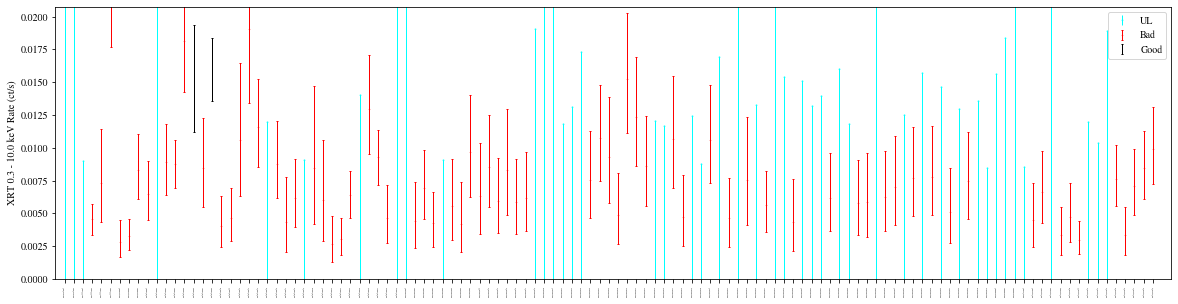

../lightcurves/xrt/[LB2005]_NGC_6946_ULX1,curve_nosys_join.csv
              MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0    53773.400889  0.035148 -0.035148  0.051093  0.000000  0.000000   
1    53785.413858  0.264608 -0.264608  0.402630  0.000000  0.000000   
2    54500.773863  0.074180 -0.074180  0.008965  0.000000  0.000000   
3    54502.182982  0.140215 -0.140215  0.004531  0.001202  0.001202   
4    54504.529611  0.005049 -0.005049  0.007340  0.004103  0.003031   
..            ...       ...       ...       ...       ...       ...   
114  59696.732428  0.106115 -0.106115  0.007646  0.002564  0.002111   
115  59703.559266  0.039678 -0.039678  0.003332  0.002183  0.001553   
116  59710.061766  0.039266 -0.039266  0.007086  0.002795  0.002234   
117  59717.649087  0.269994 -0.269994  0.008419  0.002851  0.002347   
118  59724.478901  0.009635 -0.009635  0.009917  0.003216  0.002671   

           obsID MODE   BAD     UL  BAND  
0    00035481001   PC  True   True  FULL 

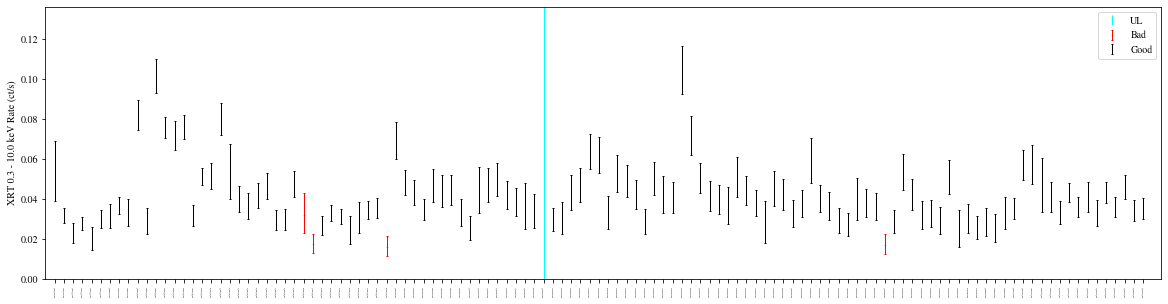

../lightcurves/xrt/[LB2005]_NGC_6946_ULX3,curve_nosys_join.csv
              MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0    53773.367573  0.001832 -0.001832  0.052561  0.016427  0.013635   
1    53785.615937  0.138191 -0.138191  0.031695  0.003794  0.003794   
2    54500.840526  0.007516 -0.007516  0.022901  0.005002  0.005002   
3    54502.149515  0.106749 -0.106749  0.027634  0.003116  0.003116   
4    54504.529611  0.005049 -0.005049  0.019770  0.006247  0.005185   
..            ...       ...       ...       ...       ...       ...   
114  59696.732428  0.106115 -0.106115  0.043235  0.005354  0.005354   
115  59703.559266  0.039678 -0.039678  0.036051  0.004911  0.004911   
116  59710.061766  0.039266 -0.039266  0.046005  0.005924  0.005924   
117  59717.517846  0.138752 -0.138752  0.034254  0.005063  0.005063   
118  59724.478901  0.009635 -0.009635  0.035259  0.005328  0.005328   

           obsID MODE    BAD     UL  BAND  
0    00035481001   PC  False  False  FUL

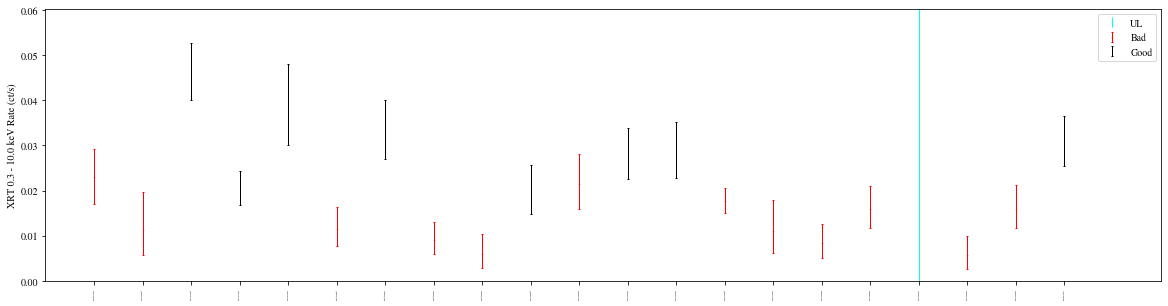

../lightcurves/xrt/[LM2005]_NGC_1042_ULX1,curve_nosys_join.csv
             MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0   54738.337174  0.603750 -0.603750  0.023093  0.006044  0.006044   
1   54788.285412  0.002713 -0.002713  0.011349  0.008239  0.005543   
2   56623.749461  0.170512 -0.170512  0.046333  0.006364  0.006364   
3   56630.352566  0.040341 -0.040341  0.020521  0.003825  0.003825   
4   56633.651671  0.008169 -0.008169  0.039089  0.008969  0.008969   
5   56841.341655  0.333888 -0.333888  0.011539  0.004868  0.003834   
6   56861.271689  0.005920 -0.005920  0.033445  0.006533  0.006533   
7   57024.014602  0.006080 -0.006080  0.009100  0.003926  0.003092   
8   57044.584564  0.005528 -0.005528  0.005857  0.004573  0.003077   
9   57205.881956  0.005354 -0.005354  0.020189  0.005367  0.005367   
10  57226.699981  0.069971 -0.069971  0.021446  0.006715  0.005576   
11  57388.951299  0.006834 -0.006834  0.028247  0.005659  0.005659   
12  57408.556312  0.005993 

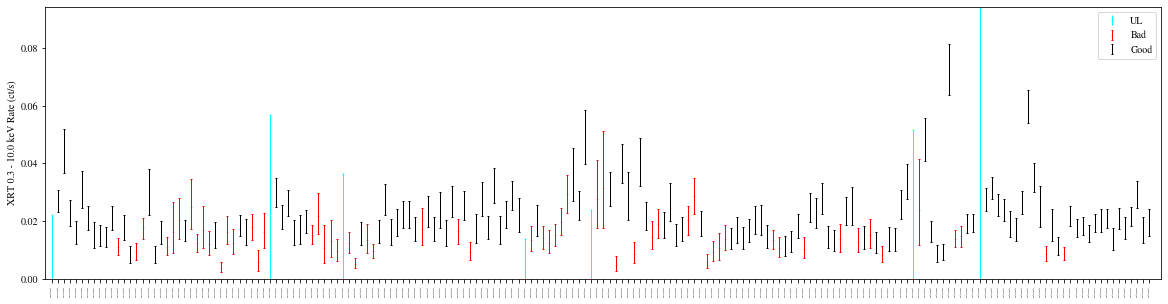

../lightcurves/xrt/[LM2005]_NGC_247_ULX1,curve_nosys_join.csv
              MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0    56695.076186  0.004208 -0.004208  0.022137  0.000000  0.000000   
1    56943.396661  0.105956 -0.105956  0.026870  0.003853  0.003853   
2    56951.348337  0.270234 -0.270234  0.044217  0.007529  0.007529   
3    56956.484525  0.009751 -0.009751  0.022819  0.004643  0.004643   
4    56964.083977  0.008213 -0.008213  0.015965  0.003901  0.003901   
..            ...       ...       ...       ...       ...       ...   
177  59556.377581  0.009591 -0.009591  0.017540  0.003854  0.003854   
178  59563.387165  0.040948 -0.040948  0.021589  0.003194  0.003194   
179  59570.343308  0.038298 -0.038298  0.029237  0.004705  0.004705   
180  59577.156958  0.006573 -0.006573  0.016770  0.004460  0.004460   
181  59584.153946  0.042928 -0.042928  0.019448  0.004617  0.004617   

           obsID MODE    BAD     UL  BAND  
0    00082125001   PC   True   True  FULL

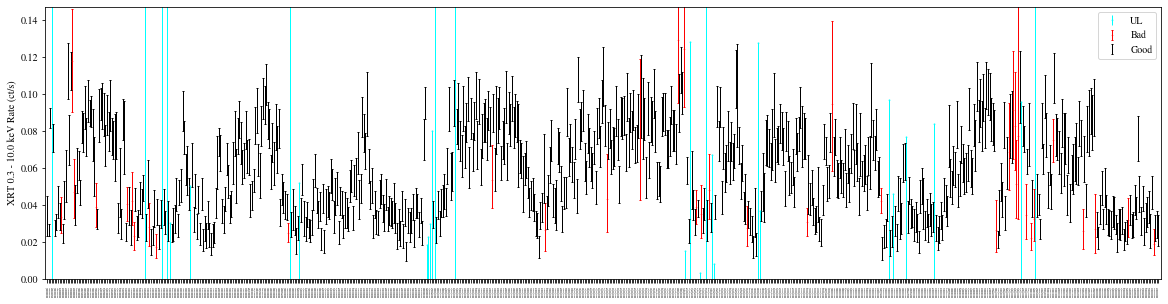

../lightcurves/xrt/[LM2005]_NGC_3031_ULX1,curve_nosys_join.csv
              MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0    53481.035678  0.002496 -0.002496  0.032897  0.011956  0.009924   
1    53607.594773  0.405223 -0.405223  0.026294  0.003136  0.003136   
2    53910.168776  0.166606 -0.166606  0.086931  0.005426  0.005426   
3    54057.848905  0.000018 -0.000018  2.621200  0.000000  0.000000   
4    54137.936574  0.030829 -0.030829  0.076214  0.007502  0.007502   
..            ...       ...       ...       ...       ...       ...   
701  59740.029402  0.004948 -0.004948  0.046564  0.009069  0.009069   
702  59742.018448  0.004803 -0.004803  0.019074  0.007611  0.006214   
703  59744.876413  0.005180 -0.005180  0.027421  0.006947  0.006947   
704  59746.069815  0.004832 -0.004832  0.029283  0.007338  0.007338   
705  59750.042302  0.005238 -0.005238  0.025475  0.009155  0.007599   

           obsID MODE    BAD     UL  BAND  
0    00035059001   PC  False  False  FUL

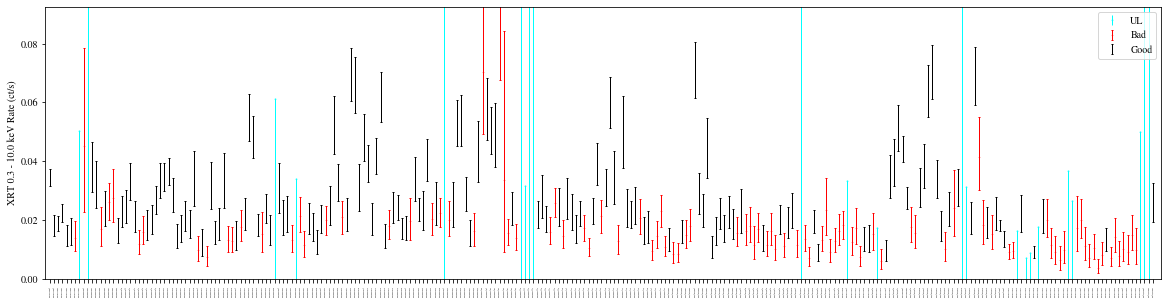

../lightcurves/xrt/[LM2005]_NGC_4395_ULX1,curve_nosys_join.csv
              MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0    53735.617981  0.372966 -0.372966  0.034410  0.002820  0.002820   
1    53800.774564  0.039284 -0.039284  0.018241  0.003571  0.003571   
2    53801.528830  0.338508 -0.338508  0.018916  0.002503  0.002503   
3    53802.534395  0.205850 -0.205850  0.022376  0.002997  0.002997   
4    53803.237847  0.038505 -0.038505  0.014785  0.003527  0.003527   
..            ...       ...       ...       ...       ...       ...   
256  57874.936126  0.002510 -0.002510  0.009957  0.007413  0.004987   
257  57874.998279  0.001495 -0.001495  0.050016  0.000000  0.000000   
258  59573.787618  0.000305 -0.000305  0.134090  0.000000  0.000000   
259  59587.857713  0.000232 -0.000232  0.182770  0.000000  0.000000   
260  59592.636003  0.004614 -0.004614  0.025829  0.006605  0.006605   

           obsID MODE    BAD     UL  BAND  
0    00035478001   PC  False  False  FUL

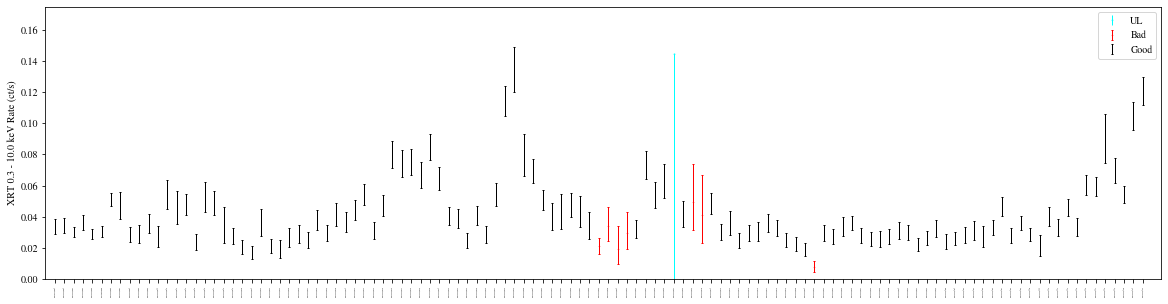

../lightcurves/xrt/[LM2005]_NGC_4559_ULX1,curve_nosys_join.csv
              MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0    53737.961351  0.171948 -0.171948  0.033698  0.004961  0.004961   
1    55940.737102  0.037783 -0.037783  0.034434  0.004790  0.004790   
2    55942.152418  0.109985 -0.109985  0.030213  0.003074  0.003074   
3    55944.435734  0.370948 -0.370948  0.036261  0.004921  0.004921   
4    55946.366218  0.174630 -0.174630  0.028706  0.003208  0.003208   
..            ...       ...       ...       ...       ...       ...   
112  59731.633788  0.002670 -0.002670  0.090096  0.015667  0.015667   
113  59733.278324  0.008807 -0.008807  0.069725  0.007782  0.007782   
114  59740.307394  0.070724 -0.070724  0.054140  0.005596  0.005596   
115  59747.541798  0.075204 -0.075204  0.104672  0.008952  0.008952   
116  59754.370410  0.075732 -0.075732  0.120652  0.008922  0.008922   

           obsID MODE    BAD     UL  BAND  
0    00035479001   PC  False  False  FUL

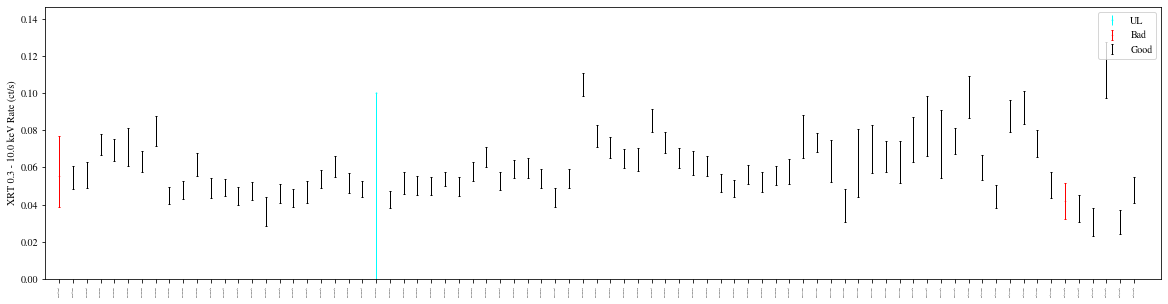

../lightcurves/xrt/[LM2005]_NGC_5204_ULX1,curve_nosys_join.csv
             MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0   56402.609588  0.002075 -0.002075  0.055489  0.021193  0.016935   
1   56411.222666  0.333449 -0.333449  0.054590  0.006423  0.006423   
2   56696.451944  0.072220 -0.072220  0.055884  0.007188  0.007188   
3   56700.808881  0.041646 -0.041646  0.072262  0.005750  0.005750   
4   56704.812086  0.039888 -0.039888  0.069462  0.005950  0.005950   
..           ...       ...       ...       ...       ...       ...   
74  59702.382779  0.005760 -0.005760  0.037804  0.007100  0.007100   
75  59704.504114  0.005238 -0.005238  0.030490  0.007527  0.007527   
76  59711.131332  0.003656 -0.003656  0.112631  0.015160  0.015160   
77  59716.769739  0.005586 -0.005586  0.030710  0.006529  0.006529   
78  59718.494060  0.007676 -0.007676  0.047826  0.007002  0.007002   

          obsID MODE    BAD     UL  BAND  
0   00080112001   PC   True  False  FULL  
1   000801

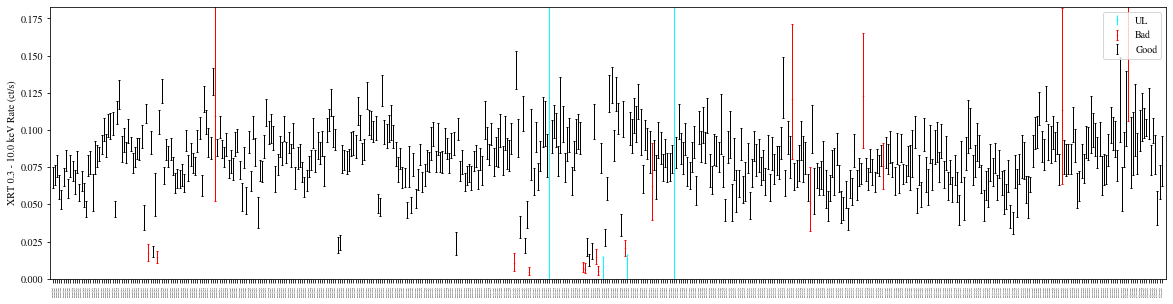

../lightcurves/xrt/[LM2005]_NGC_5408_ULX1,curve_nosys_join.csv
              MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0    54565.858485  0.040080 -0.040080  0.068208  0.007095  0.007095   
1    54567.732482  0.039696 -0.039696  0.069658  0.006713  0.006713   
2    54571.885651  0.103877 -0.103877  0.076101  0.007446  0.007446   
3    54574.126850  0.071028 -0.071028  0.061684  0.008119  0.008119   
4    54578.903669  0.040708 -0.040708  0.053417  0.006190  0.006190   
..            ...       ...       ...       ...       ...       ...   
494  59476.816959  0.240345 -0.240345  0.099751  0.008672  0.008672   
495  59478.472150  0.101113 -0.101113  0.083414  0.013233  0.013233   
496  59479.829462  0.002844 -0.002844  0.047709  0.011426  0.011426   
497  59482.216346  0.004135 -0.004135  0.064940  0.011446  0.011446   
498  59483.280165  0.002133 -0.002133  0.079324  0.016858  0.016858   

           obsID MODE    BAD     UL  BAND  
0    00090041001   PC  False  False  FUL

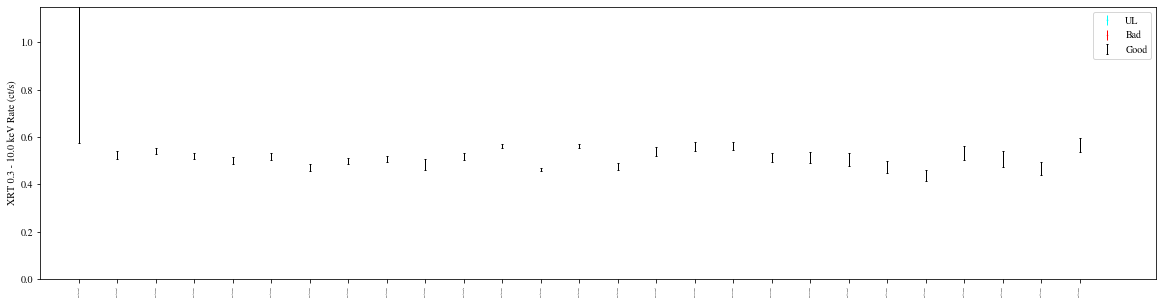

../lightcurves/xrt/[LM2005]_NGC_598_ULX1,curve_nosys_join.csv
             MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0   54460.881912  0.067062 -0.067062  0.884566  0.387370  0.309529   
1   55503.755594  0.234585 -0.234585  0.523877  0.015669  0.015669   
2   55507.712850  0.108589 -0.108589  0.540931  0.014338  0.014338   
3   55511.291601  0.274284 -0.274284  0.519740  0.014203  0.014203   
4   55515.408218  0.173618 -0.173618  0.499691  0.013732  0.013732   
5   55523.394318  0.270182 -0.270182  0.517702  0.014515  0.014515   
6   55531.351375  0.273519 -0.273519  0.470607  0.013300  0.013300   
7   55539.787234  0.196001 -0.196001  0.499299  0.013574  0.013574   
8   55548.530177  0.110009 -0.110009  0.507971  0.013494  0.013494   
9   55555.713441  0.075336 -0.075336  0.484292  0.022566  0.022566   
10  55563.270521  0.268273 -0.268273  0.516013  0.014172  0.014172   
11  56236.430984  0.372348 -0.372348  0.559860  0.008554  0.008554   
12  56329.430732  0.401755 -

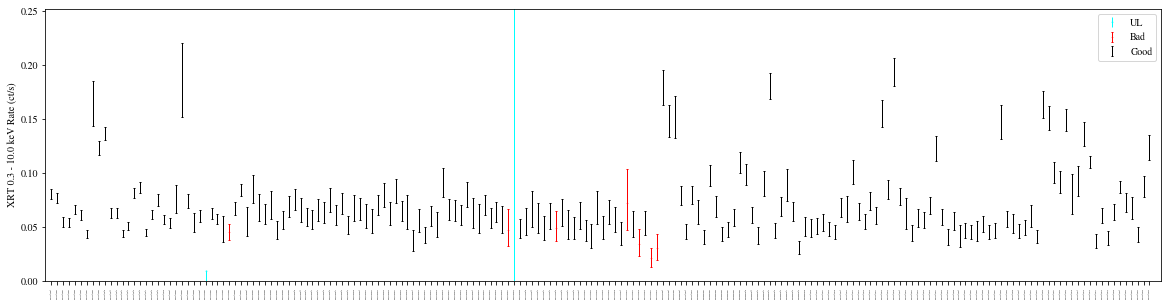

../lightcurves/xrt/[SRW2006b]_NGC_55_ULX,curve_nosys_join.csv
              MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0    56392.276038  0.134249 -0.134249  0.080377  0.004654  0.004654   
1    56399.580799  0.107264 -0.107264  0.076800  0.004445  0.004445   
2    56406.739869  0.173872 -0.173872  0.054640  0.004435  0.004435   
3    56413.140037  0.106345 -0.106345  0.053945  0.004004  0.004004   
4    56420.617977  0.378430 -0.378430  0.065854  0.004114  0.004114   
..            ...       ...       ...       ...       ...       ...   
181  59724.235567  0.007835 -0.007835  0.072213  0.008901  0.008901   
182  59731.851938  0.005340 -0.005340  0.067498  0.009777  0.009777   
183  59738.489517  0.008038 -0.008038  0.043328  0.006934  0.006934   
184  59745.483184  0.373384 -0.373384  0.087130  0.009750  0.009750   
185  59752.012563  0.007211 -0.007211  0.123340  0.011365  0.011365   

           obsID MODE    BAD     UL  BAND  
0    00032619001   PC  False  False  FULL

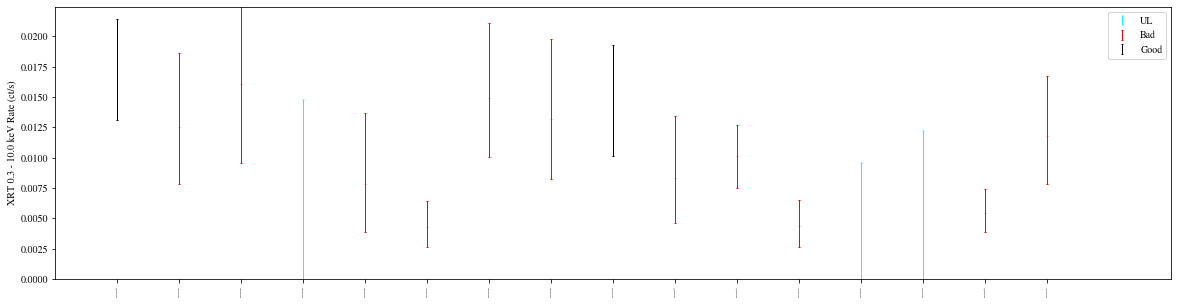

../lightcurves/xrt/[SST2011]_J141939.39+564137.8,curve_nosys_join.csv
             MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg  \
0   57349.760996  0.008256 -0.008256  0.017253  0.004167  0.004167   
1   57444.553103  0.004324 -0.004324  0.012489  0.006139  0.004656   
2   57559.797321  0.002481 -0.002481  0.016056  0.008767  0.006470   
3   57664.796436  0.005427 -0.005427  0.014722  0.000000  0.000000   
4   57667.788468  0.002975 -0.002975  0.007821  0.005860  0.003942   
5   57670.738178  0.034534 -0.034534  0.004240  0.002159  0.001637   
6   57685.981794  0.004092 -0.004092  0.014928  0.006174  0.004863   
7   57686.052581  0.003439 -0.003439  0.013222  0.006560  0.004979   
8   57700.884398  0.005659 -0.005659  0.014263  0.005070  0.004142   
9   57704.413811  0.004019 -0.004019  0.008280  0.005164  0.003674   
10  57709.521011  0.467655 -0.467655  0.010113  0.002594  0.002594   
11  57710.715713  0.533370 -0.533370  0.004337  0.002207  0.001675   
12  57713.311903  0.

In [11]:
for csv in csv_files:
    simbad_name = csv.split('/')[-1].split(',')[0]
    
    df = pd.read_csv(csv, dtype={'obsID':str})
    df['Rateneg'] = df['Rateneg'].abs()
    df_ul   = df[df['UL'] == True]
    
    df_bad  = df[(df['BAD'] == True) & (df['UL'] == False)]
    
    df_good = df[(df['UL'] == False) & (df['BAD'] == False)]
    
    fig, ax = plt.subplots(figsize=(20, 5), facecolor='white')
    
    
    ax.errorbar(df_ul.index, df_ul['Rate'], yerr=[df_ul['Rate'], [0]*len(df_ul)], color='cyan', lw=1.0, capsize=0.0, ls='none', marker='v', markersize=1, label='UL')
    ax.errorbar(df_bad.index, df_bad['Rate'], yerr=[df_bad['Rateneg'], df_bad['Ratepos']], color='red', lw=1.0, capsize=1.0, marker='.', ls='none', markersize=1, label='Bad')
    if len(df_good) > 1:
        ax.errorbar(df_good.index, df_good['Rate'], yerr=[df_good['Rateneg'], df_good['Ratepos']], color='black', lw=1.0, capsize=1.0, ls='none', markersize=1, label='Good')
    
    #for i in range(len(df)):
    #    ax.text(i, -0.03, df['obsID'].iloc[i], rotation=90, size=3)
    
    ax.set_xticks(df.index)
    ax.set_xticklabels(df['obsID'], rotation=90, size=2)
    ax.legend(loc='upper right')
    if len(df_good) > 1:
        ax.set_ylim(0, 1.3*max(df_good['Rate']))
    ax.set_xlim(-1,len(df)+1)
    ax.set_ylabel('XRT 0.3 - 10.0 keV Rate (ct/s)')
    plt.savefig(f'../lightcurves/xrt_plot/{simbad_name},full,sequential.pdf', bbox_inches='tight')
    plt.savefig(f'../lightcurves/xrt_plot/{simbad_name},full,sequential.png', bbox_inches='tight')
    plt.show()
    print(csv)
    print(df)

    

In [ ]:
df_ul['MJD']

In [ ]:
fig, ax = plt.subplots(figsize=(6.25, 1.25))
ax.plot([1,2,3])
plt.savefig('test.pdf', bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(6.25, 1.25))
ax.plot([1,2,3])
plt.savefig('test.pdf', bbox_inches='tight')

fig, ax = plt.subplots(figsize=(6.25, 1.25))
ax.plot([3,2,1])
plt.savefig('test2.pdf', bbox_inches='tight')